# SolarView

### Tarefa 3
Gerar um relatório sobre o consumo de energia em Megawatts, você pode escolher uma análise uni variavel ou multi variavel, porém lembre que a escolha das variaveis para se trabalhar e tarefa chave de um cientista de dados.

## **Relatório de Consumo de Energia**

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Carregando os dados do SQLite
con = sqlite3.connect('../output/energy.db')
dados = pd.read_sql('select * from energy_consumption', con, parse_dates = ['Datetime'])
con.close()

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-04-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22259.0
1,1998-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21244.0
2,1998-04-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20651.0
3,1998-04-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20421.0
4,1998-04-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20713.0


### AEP - American Electric Power

In [3]:
dados_aep = dados[['Datetime','AEP']]
dados_aep = dados_aep.dropna()
dados_aep = dados_aep.set_index('Datetime')
dados_aep['date'] = dados_aep.index.date 
dados_aep['year'] = dados_aep.index.year
dados_aep['month'] = dados_aep.index.month
dados_aep['day'] = dados_aep.index.day # Day of Month
dados_aep['dayofweek'] = dados_aep.index.dayofweek
dados_aep['dayofweekname'] = dados_aep.index.weekday_name
dados_aep['hour'] = dados_aep.index.hour

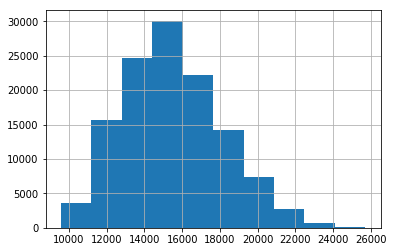

In [4]:
# Histograma
dados_aep['AEP'].hist()
plt.show()

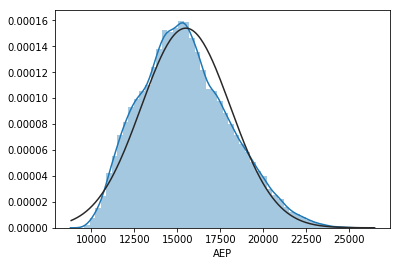

In [5]:
# Densidade
sns.distplot(dados_aep.AEP, fit = stats.norm);

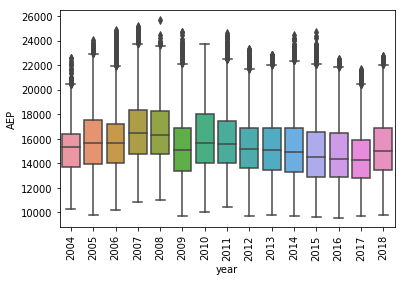

In [6]:
# Boxplot por ano
ax = sns.boxplot(data = dados_aep, x='year',y='AEP')
for item in ax.get_xticklabels():
    item.set_rotation(90)

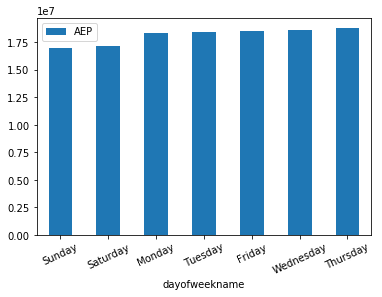

In [38]:
# Consumo por dia no último ano
dados_aep_last = dados_aep.loc[dados_aep['year'] == 2017]
dados_aep_last = dados_aep_last[['dayofweekname','AEP']].groupby('dayofweekname').agg('sum')
dados_aep_last.sort_values(by=['AEP']).plot.bar(rot=25)
plt.show()

### COMED - Commonwealth Edison

In [40]:
dados_comed = dados[['Datetime','COMED']]
dados_comed = dados_comed.dropna()
dados_comed = dados_comed.set_index('Datetime')
dados_comed['date'] = dados_comed.index.date 
dados_comed['year'] = dados_comed.index.year
dados_comed['month'] = dados_comed.index.month
dados_comed['day'] = dados_comed.index.day # Day of Month
dados_comed['dayofweek'] = dados_comed.index.dayofweek
dados_comed['dayofweekname'] = dados_comed.index.weekday_name
dados_comed['hour'] = dados_comed.index.hour

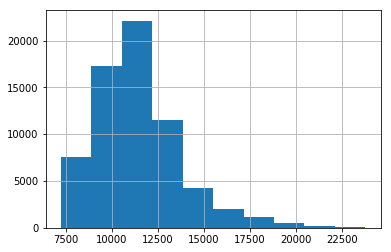

In [43]:
# Histograma
dados_comed['COMED'].hist()
plt.show()

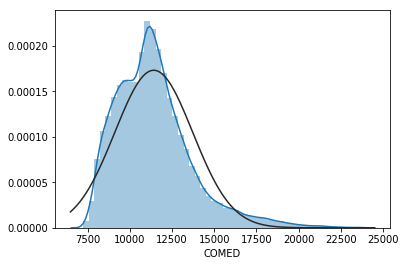

In [44]:
# Densidade
sns.distplot(dados_comed.COMED, fit = stats.norm);

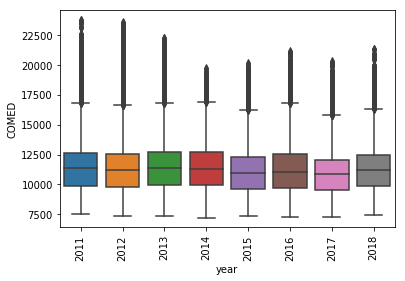

In [45]:
# Boxplot por ano
ax = sns.boxplot(data = dados_comed, x='year',y='COMED')
for item in ax.get_xticklabels():
    item.set_rotation(90)

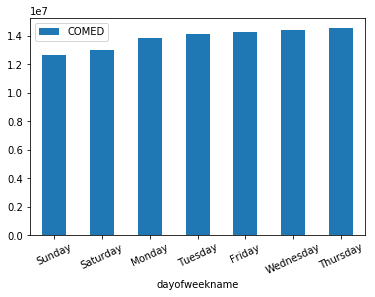

In [47]:
# Consumo por dia no último ano
dados_comed_last = dados_comed.loc[dados_comed['year'] == 2017]
dados_comed_last = dados_comed_last[['dayofweekname','COMED']].groupby('dayofweekname').agg('sum')
dados_comed_last.sort_values(by=['COMED']).plot.bar(rot=25)
plt.show()

### DAYTON - The Dayton Power and Light Company